In [4]:
import matplotlib
print(matplotlib.__version__)

3.3.4


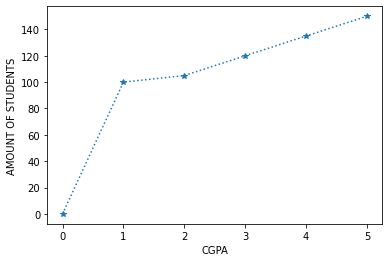

In [14]:
import matplotlib.pyplot as plt
import numpy as np
xpoints = np.array([0,1,2,3,4,5])
ypoints = np.array([ 0,100,105,120,135,150])
plt.xlabel("CGPA")
plt.ylabel("AMOUNT OF STUDENTS")

plt.plot(xpoints ,ypoints,'*:')
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sugar = pd.read_csv('CEN414DATA.csv')
sugar.info()
sugar
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  410 non-null    object 
 1   Code                    357 non-null    object 
 2   Year                    410 non-null    int64  
 3   Sugar cane-Yield-hg/ha  410 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


,Entity,Code,Year,Sugar cane-Yield-hg/ha
0,Africa,NaN,2009,64.6924
1,Africa,NaN,2010,63.8202
2,Africa,NaN,2011,64.2525
3,Africa,NaN,2012,63.8544
4,Africa,NaN,2013,65.1940
...,...,...,...,...
405,Zimbabwe,ZWE,2014,89.4228
406,Zimbabwe,ZWE,2015,77.6906
407,Zimbabwe,ZWE,2016,80.0690
408,Zimbabwe,ZWE,2017,80.0368


No handles with labels found to put in legend.
C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Code', ylabel='Sugar cane-Yield-hg/ha'>

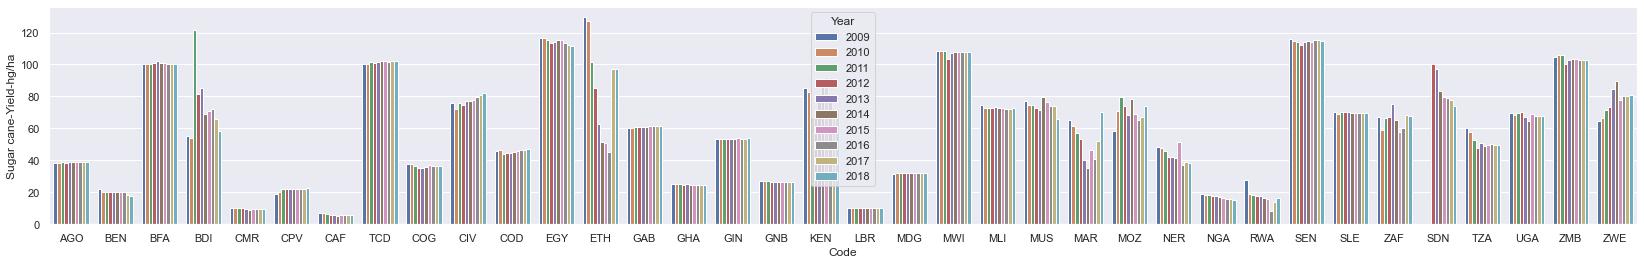

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sugar = pd.read_csv('CEN414DATA.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


 
    

plt.legend(loc='upper right')
sns.barplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year'])


C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


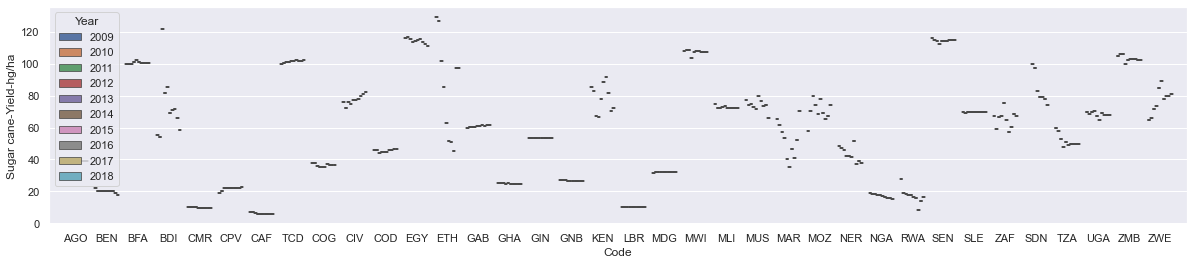

In [7]:
sns.boxplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year'])
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*46+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()


C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Code', ylabel='Sugar cane-Yield-hg/ha'>

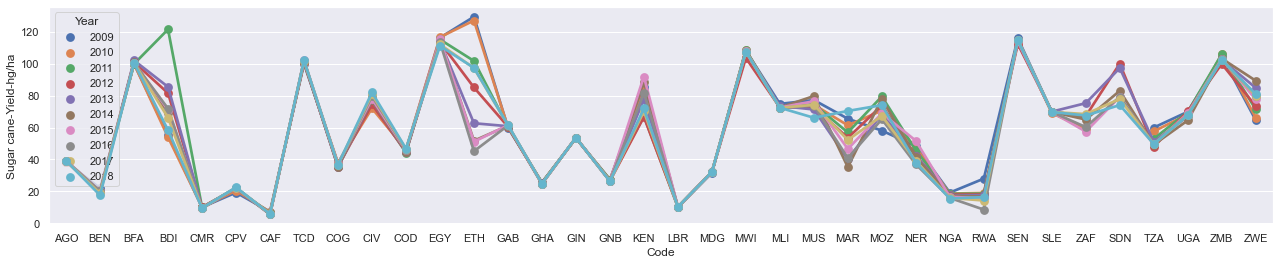

In [6]:
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*46+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
sns.pointplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year']) 
 


C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Code', ylabel='Sugar cane-Yield-hg/ha'>

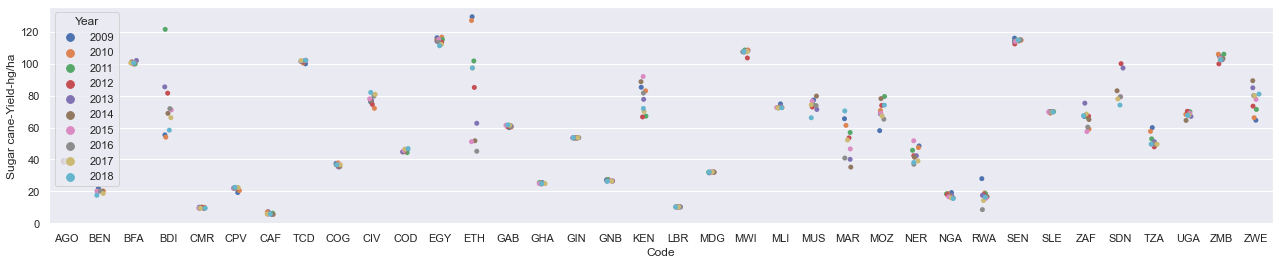

In [9]:
 plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*46+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
sns.stripplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year']) 